In [38]:

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
%matplotlib inline

In [39]:
df = pd.read_csv('student_lifestyle_100k.csv')

print("=" * 60)
print("DATASET OVERVIEW")
print("=" * 60)
print(f"Shape: {df.shape}")
print(f"\nFirst few rows:\n{df.head()}")
print(f"\nData Types:\n{df.dtypes}")
print(f"\nMissing Values:\n{df.isnull().sum()}")
print(f"\nMemory Usage: {df.memory_usage(deep=True).sum() / 1024**2:.2f} MB")

DATASET OVERVIEW
Shape: (100000, 11)

First few rows:
   Student_ID  Age  Gender   Department  CGPA  Sleep_Duration  Study_Hours  \
0        1001   22  Female      Science  3.50             7.3          3.3   
1        1002   20    Male  Engineering  2.72             5.5          7.2   
2        1003   20    Male      Medical  3.01             5.4          2.3   
3        1004   21    Male  Engineering  3.63             8.1          2.0   
4        1005   19    Male         Arts  3.14             6.8          2.6   

   Social_Media_Hours  Physical_Activity  Stress_Level  Depression  
0                 3.4                114             5       False  
1                 6.0                142             2       False  
2                 1.8                137             3       False  
3                 4.6                130             3       False  
4                 4.3                  4             6       False  

Data Types:
Student_ID              int64
Age                 

In [40]:
print("\n" + "=" * 60)
print("DESCRIPTIVE STATISTICS")
print("=" * 60)
print(df.describe().round(2))



DESCRIPTIVE STATISTICS
       Student_ID        Age       CGPA  Sleep_Duration  Study_Hours  \
count   100000.00  100000.00  100000.00        100000.0    100000.00   
mean     51000.50      21.01       2.90             7.0         4.51   
std      28867.66       2.00       0.53             1.5         1.98   
min       1001.00      18.00       1.56             3.0         0.00   
25%      26000.75      19.00       2.45             6.0         3.20   
50%      51000.50      21.00       2.90             7.0         4.50   
75%      76000.25      23.00       3.35             8.0         5.80   
max     101000.00      24.00       4.00            12.0        12.80   

       Social_Media_Hours  Physical_Activity  Stress_Level  
count           100000.00          100000.00     100000.00  
mean                 3.50              74.35          4.13  
std                  1.49              43.37          1.42  
min                  0.00               0.00          2.00  
25%                  2

In [41]:
print("\n" + "=" * 60)
print("CATEGORICAL VARIABLES")
print("=" * 60)
categorical_cols = df.select_dtypes(include=['object']).columns
for col in categorical_cols:
    print(f"\n{col} Distribution:")
    print(df[col].value_counts())



CATEGORICAL VARIABLES

Gender Distribution:
Gender
Male      50120
Female    49880
Name: count, dtype: int64

Department Distribution:
Department
Science        20071
Engineering    20057
Arts           19998
Medical        19964
Business       19910
Name: count, dtype: int64


In [42]:
print("\n" + "=" * 60)
print("CORRELATION ANALYSIS")
print("=" * 60)
numeric_cols = df.select_dtypes(include=[np.number]).columns
correlation_matrix = df[numeric_cols].corr()
print(correlation_matrix.round(2))



CORRELATION ANALYSIS
                    Student_ID  Age  CGPA  Sleep_Duration  Study_Hours  \
Student_ID                1.00  0.0 -0.00            0.00         0.00   
Age                       0.00  1.0  0.00            0.00        -0.00   
CGPA                     -0.00  0.0  1.00            0.02         0.10   
Sleep_Duration            0.00  0.0  0.02            1.00         0.00   
Study_Hours               0.00 -0.0  0.10            0.00         1.00   
Social_Media_Hours       -0.00 -0.0 -0.09           -0.00         0.01   
Physical_Activity         0.00 -0.0  0.00            0.00        -0.00   
Stress_Level             -0.01  0.0 -0.01           -0.28         0.01   

                    Social_Media_Hours  Physical_Activity  Stress_Level  
Student_ID                       -0.00                0.0         -0.01  
Age                              -0.00               -0.0          0.00  
CGPA                             -0.09                0.0         -0.01  
Sleep_Duration 

In [43]:
if 'CGPA' in df.columns:
    print("\nTop Correlations with CGPA:")
    cgpa_corr = correlation_matrix['CGPA'].sort_values(ascending=False)
    print(cgpa_corr[1:6].round(2))


Top Correlations with CGPA:
Study_Hours          0.10
Sleep_Duration       0.02
Physical_Activity    0.00
Age                  0.00
Student_ID          -0.00
Name: CGPA, dtype: float64


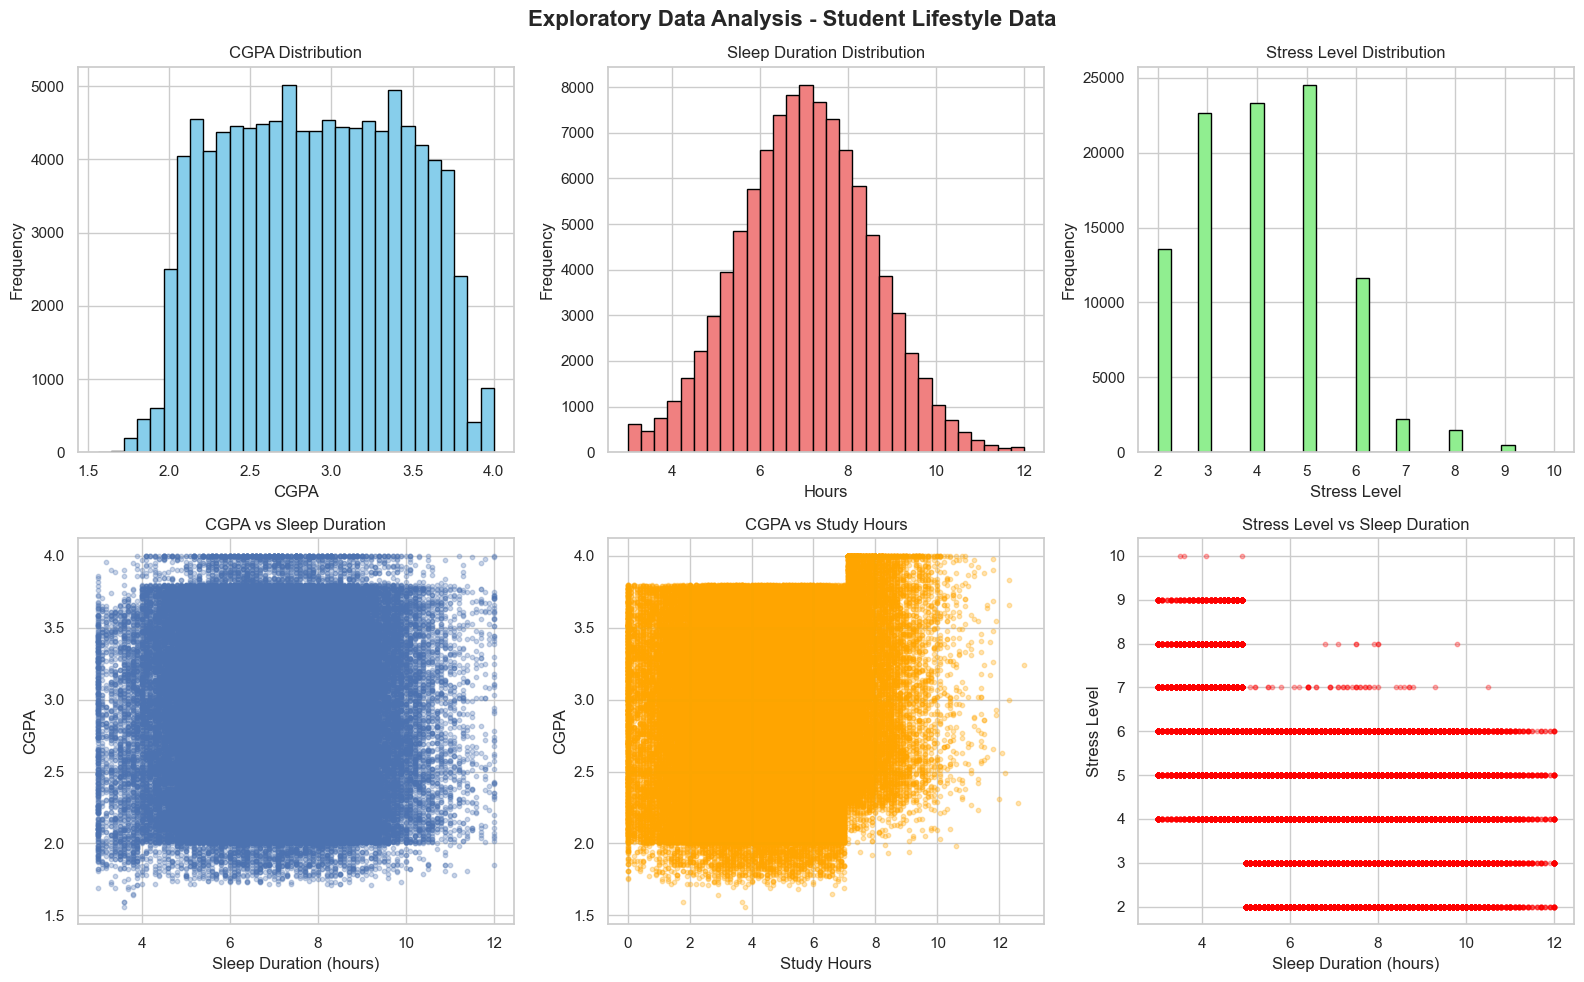

In [44]:
fig, axes = plt.subplots(2, 3, figsize=(16, 10))
fig.suptitle('Exploratory Data Analysis - Student Lifestyle Data', fontsize=16, fontweight='bold')

# Distribution of CGPA
axes[0, 0].hist(df['CGPA'], color='skyblue', edgecolor='black', bins=30)
axes[0, 0].set_title('CGPA Distribution')
axes[0, 0].set_xlabel('CGPA')
axes[0, 0].set_ylabel('Frequency')

# Distribution of Sleep Duration
axes[0, 1].hist(df['Sleep_Duration'], color='lightcoral', edgecolor='black', bins=30)
axes[0, 1].set_title('Sleep Duration Distribution')
axes[0, 1].set_xlabel('Hours')
axes[0, 1].set_ylabel('Frequency')

# Distribution of Stress Level
axes[0, 2].hist(df['Stress_Level'], color='lightgreen', edgecolor='black', bins=30)
axes[0, 2].set_title('Stress Level Distribution')
axes[0, 2].set_xlabel('Stress Level')
axes[0, 2].set_ylabel('Frequency')

# Scatter: CGPA vs Sleep Duration
axes[1, 0].scatter(df['Sleep_Duration'], df['CGPA'], alpha=0.3, s=10)
axes[1, 0].set_title('CGPA vs Sleep Duration')
axes[1, 0].set_xlabel('Sleep Duration (hours)')
axes[1, 0].set_ylabel('CGPA')

# Scatter: CGPA vs Study Hours
axes[1, 1].scatter(df['Study_Hours'], df['CGPA'], alpha=0.3, s=10, color='orange')
axes[1, 1].set_title('CGPA vs Study Hours')
axes[1, 1].set_xlabel('Study Hours')
axes[1, 1].set_ylabel('CGPA')

# Scatter: Stress Level vs Sleep Duration
axes[1, 2].scatter(df['Sleep_Duration'], df['Stress_Level'], alpha=0.3, s=10, color='red')
axes[1, 2].set_title('Stress Level vs Sleep Duration')
axes[1, 2].set_xlabel('Sleep Duration (hours)')
axes[1, 2].set_ylabel('Stress Level')

plt.tight_layout()
plt.show()

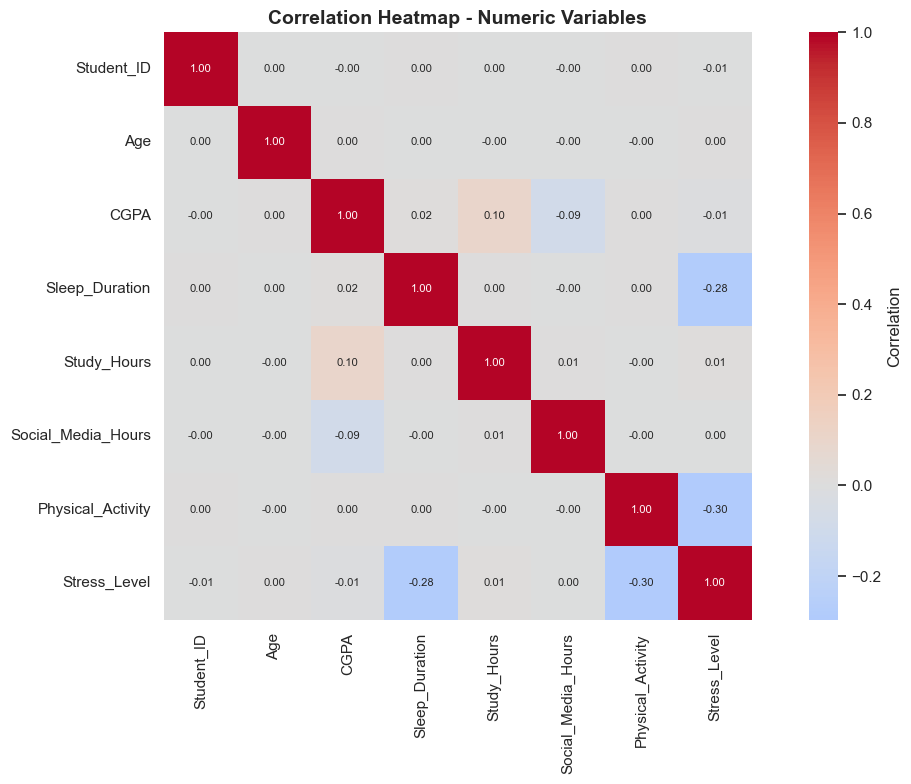

In [45]:
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', center=0, 
            fmt='.2f', square=True, cbar_kws={'label': 'Correlation'}, annot_kws={'size': 8})
plt.title('Correlation Heatmap - Numeric Variables', fontsize=14, fontweight='bold')
plt.tight_layout()
plt.show()

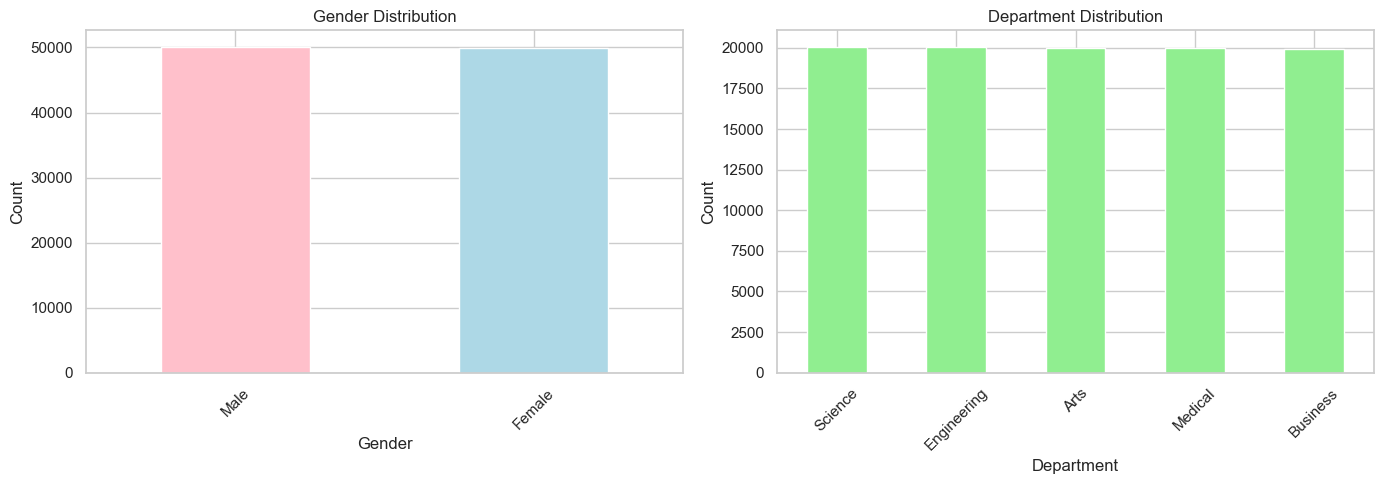

In [46]:
fig, axes = plt.subplots(1, 2, figsize=(14, 5))

df['Gender'].value_counts().plot(kind='bar', ax=axes[0], color=['pink', 'lightblue'])
axes[0].set_title('Gender Distribution')
axes[0].set_xlabel('Gender')
axes[0].set_ylabel('Count')
axes[0].tick_params(axis='x', rotation=45)

df['Department'].value_counts().plot(kind='bar', ax=axes[1], color='lightgreen')
axes[1].set_title('Department Distribution')
axes[1].set_xlabel('Department')
axes[1].set_ylabel('Count')
axes[1].tick_params(axis='x', rotation=45)

plt.tight_layout()
plt.show()


In [47]:
print("\n" + "=" * 60)
print("DEPRESSION ANALYSIS")
print("=" * 60)
print(f"Depression Distribution:\n{df['Depression'].value_counts()}")
print(f"Depression Rate: {(df['Depression'].sum() / len(df) * 100):.2f}%")
print(f"Total Students: {len(df):,}")
print(f"Students with Depression: {df['Depression'].sum():,}")
print(f"Students without Depression: {(~df['Depression']).sum():,}")



DEPRESSION ANALYSIS
Depression Distribution:
Depression
False    89938
True     10062
Name: count, dtype: int64
Depression Rate: 10.06%
Total Students: 100,000
Students with Depression: 10,062
Students without Depression: 89,938


In [48]:
print("\n" + "=" * 60)
print("DEPRESSION BY GENDER")
print("=" * 60)
depression_by_gender = df.groupby('Gender')['Depression'].agg(['sum', 'count', lambda x: f"{(x.sum()/len(x)*100):.2f}%"])
depression_by_gender.columns = ['With Depression', 'Total', 'Depression Rate']
print(depression_by_gender)


DEPRESSION BY GENDER
        With Depression  Total Depression Rate
Gender                                        
Female             4951  49880           9.93%
Male               5111  50120          10.20%


In [49]:
print("DEPRESSION BY DEPARTMENT")
print("=" * 60)
depression_by_dept = df.groupby('Department')['Depression'].agg(['sum', 'count', lambda x: f"{(x.sum()/len(x)*100):.2f}%"])
depression_by_dept.columns = ['With Depression', 'Total', 'Depression Rate']
print(depression_by_dept)

DEPRESSION BY DEPARTMENT
             With Depression  Total Depression Rate
Department                                         
Arts                    2030  19998          10.15%
Business                2028  19910          10.19%
Engineering             2020  20057          10.07%
Medical                 1987  19964           9.95%
Science                 1997  20071           9.95%


In [50]:
print("\n" + "=" * 60)
print("CGPA BY DEPARTMENT")
print("=" * 60)
print(df.groupby('Department')[['CGPA', 'Sleep_Duration', 'Study_Hours', 'Stress_Level']].mean().round(2))

print("\n" + "=" * 60)
print("CGPA BY GENDER")
print("=" * 60)
print(df.groupby('Gender')[['CGPA', 'Sleep_Duration', 'Study_Hours', 'Stress_Level']].mean().round(2))



CGPA BY DEPARTMENT
             CGPA  Sleep_Duration  Study_Hours  Stress_Level
Department                                                  
Arts          2.9            7.00         4.50          4.13
Business      2.9            6.99         4.55          4.13
Engineering   2.9            6.99         4.48          4.13
Medical       2.9            7.00         4.50          4.12
Science       2.9            7.00         4.51          4.15

CGPA BY GENDER
        CGPA  Sleep_Duration  Study_Hours  Stress_Level
Gender                                                 
Female   2.9            6.99         4.51          4.13
Male     2.9            7.00         4.51          4.13


In [51]:
print("\n" + "=" * 60)
print("DISTRIBUTION SHAPE (Skewness & Kurtosis)")
print("=" * 60)
numeric_cols = ['CGPA', 'Sleep_Duration', 'Study_Hours', 'Social_Media_Hours', 'Physical_Activity', 'Stress_Level']
for col in numeric_cols:
    skew = df[col].skew()
    kurt = df[col].kurtosis()
    print(f"{col}: Skewness = {skew:.2f}, Kurtosis = {kurt:.2f}")



DISTRIBUTION SHAPE (Skewness & Kurtosis)
CGPA: Skewness = 0.00, Kurtosis = -1.09
Sleep_Duration: Skewness = 0.03, Kurtosis = -0.09
Study_Hours: Skewness = 0.08, Kurtosis = -0.17
Social_Media_Hours: Skewness = 0.06, Kurtosis = -0.16
Physical_Activity: Skewness = 0.01, Kurtosis = -1.21
Stress_Level: Skewness = 0.43, Kurtosis = 0.00


In [52]:
print("\n" + "=" * 60)
print("OUTLIER DETECTION (IQR Method)")
print("=" * 60)
for col in numeric_cols:
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    outliers = df[(df[col] < lower_bound) | (df[col] > upper_bound)]
    print(f"{col}: {len(outliers)} outliers ({len(outliers)/len(df)*100:.2f}%)")



OUTLIER DETECTION (IQR Method)
CGPA: 0 outliers (0.00%)
Sleep_Duration: 369 outliers (0.37%)
Study_Hours: 432 outliers (0.43%)
Social_Media_Hours: 328 outliers (0.33%)
Physical_Activity: 0 outliers (0.00%)
Stress_Level: 478 outliers (0.48%)


In [53]:
print("\n" + "=" * 60)
print("MEAN VALUES: WITH vs WITHOUT DEPRESSION")
print("=" * 60)
depression_comparison = df.groupby('Depression')[numeric_cols].mean().round(2)
print(depression_comparison)



MEAN VALUES: WITH vs WITHOUT DEPRESSION
            CGPA  Sleep_Duration  Study_Hours  Social_Media_Hours  \
Depression                                                          
False       2.93            7.03         4.52                3.49   
True        2.61            6.74         4.42                3.58   

            Physical_Activity  Stress_Level  
Depression                                   
False                   74.56          4.10  
True                    72.55          4.45  


In [54]:
print("\n" + "=" * 60)
print("KEY INSIGHTS")
print("=" * 60)
print(f"CGPA - Mean: {df['CGPA'].mean():.2f}, Median: {df['CGPA'].median():.2f}, Std: {df['CGPA'].std():.2f}")
print(f"Sleep Duration - Mean: {df['Sleep_Duration'].mean():.2f} hrs, Median: {df['Sleep_Duration'].median():.2f} hrs")
print(f"Study Hours - Mean: {df['Study_Hours'].mean():.2f} hrs, Median: {df['Study_Hours'].median():.2f} hrs")
print(f"Stress Level - Mean: {df['Stress_Level'].mean():.2f}, Median: {df['Stress_Level'].median():.2f}")
print(f"Physical Activity - Mean: {df['Physical_Activity'].mean():.2f}, Median: {df['Physical_Activity'].median():.2f}")
print(f"Social Media Hours - Mean: {df['Social_Media_Hours'].mean():.2f} hrs, Median: {df['Social_Media_Hours'].median():.2f} hrs")
print(f"\nAge Range: {df['Age'].min()} - {df['Age'].max()} years")


KEY INSIGHTS
CGPA - Mean: 2.90, Median: 2.90, Std: 0.53
Sleep Duration - Mean: 7.00 hrs, Median: 7.00 hrs
Study Hours - Mean: 4.51 hrs, Median: 4.50 hrs
Stress Level - Mean: 4.13, Median: 4.00
Physical Activity - Mean: 74.35, Median: 74.00
Social Media Hours - Mean: 3.50 hrs, Median: 3.50 hrs

Age Range: 18 - 24 years
